In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

В качестве датасета используются данные, отражающие удельный вес численности работников, имеющих право на компенсации, взятые с сайта росстата https://rosstat.gov.ru/working_conditions#

In [9]:
# Данные были отредактированы и добавлены в отдельный файл
df = pd.read_excel(r'usl_trud2017.xlsx')
display(df.head(), df.shape)

,Субъекты РФ,2017
0,Белгородская область,42.7
1,Брянская область,32.1
2,Владимирская область,31.4
3,Воронежская область,37.9
4,Ивановская область,45.4


(87, 2)

ShapiroResult(statistic=0.9884085685102778, pvalue=0.6372940973812197)

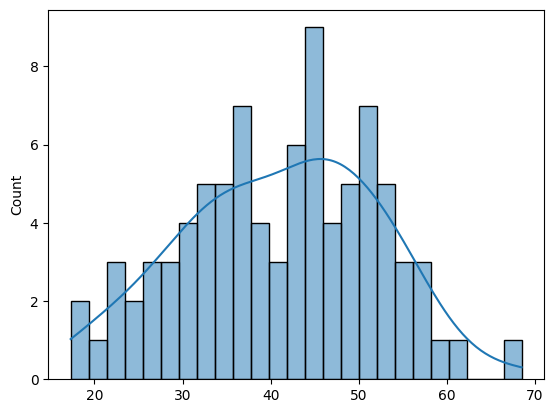

In [10]:
data = df[2017].to_list()
sns.histplot(data=data, kde=True, bins=25)
stats.shapiro(data) # получается, что значение распределено нормально 

Тест Шапиро-Уилка показал p-value = 0.6372940973812197. Получается, достаточно оснований для отклонения нулевой гипотезы, которая утверждает, что данные распределены нормально.

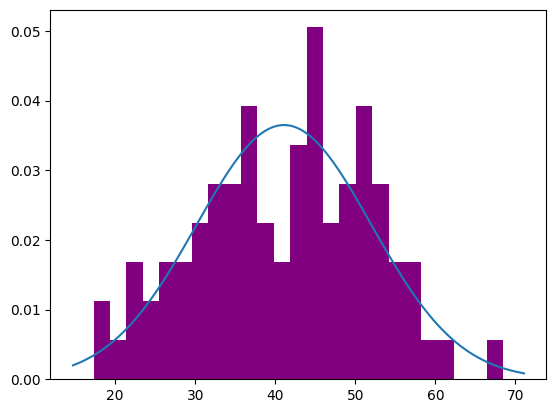

In [11]:
data_mean, data_std = stats.norm.fit(data) # расчет среднего значения и стандартного отклонения
plt.hist(data, bins=25, color='purple', density=True)
x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)
y = stats.norm.pdf(x, data_mean, data_std)
plt.plot(x, y)
plt.show()

In [12]:
# Расчет всех показателей
mExp = np.mean(data)
print('Математическое ожидание:', mExp)
var = np.var(data)
print('Дисперсия:', var)
skew = stats.skew(data)
print('Асимметрия:', skew)
exc = stats.kurtosis(data)
print('Эксцесс:', exc)
quan = np.quantile(data, [0.025, 0.05, 0.95])
print('Квантиль уровня 0.025:', quan[0])
print('Квантиль уровня 0.05:', quan[1])
print('Квантиль уровня 0.95:', quan[2])

Математическое ожидание: 41.09310344827587
Дисперсия: 119.53374554102261
Асимметрия: -0.12203856106431905
Эксцесс: -0.5245989237159048
Квантиль уровня 0.025: 19.900000000000002
Квантиль уровня 0.05: 22.3
Квантиль уровня 0.95: 57.25
